In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./benchmark_data.csv")
df

,profile,static_ssid,strong,implicit,partial,code_size,compute_time
0,server,False,False,False,False,82,169
1,server,False,False,False,True,83,139
2,server,False,False,True,False,83,135
3,server,False,False,True,True,83,103
4,server,False,True,False,False,88,171
5,server,False,True,False,True,88,138
6,server,False,True,True,False,87,134
7,server,False,True,True,True,88,103
8,server,True,False,False,False,81,169
9,server,True,False,False,True,82,139


In [12]:
rel_df = df[df.profile == "release"]
ser_df = df[df.profile == "server"]

rel_df, ser_df

(    profile  static_ssid  strong  implicit  partial  code_size  compute_time
 16  release        False   False     False    False        131           148
 17  release        False   False     False     True        136           121
 18  release        False   False      True    False        131           117
 19  release        False   False      True     True        137            89
 20  release        False    True     False    False        138           148
 21  release        False    True     False     True        141           118
 22  release        False    True      True    False        138           117
 23  release        False    True      True     True        141            89
 24  release         True   False     False    False        130           145
 25  release         True   False     False     True        135           119
 26  release         True   False      True    False        131           115
 27  release         True   False      True     True        136 

In [21]:
# average code size difference between release mode and server mode
code_sz_diffs = [r-s for (r, s) in zip(rel_df.code_size, ser_df.code_size)]
sum(code_sz_diffs) / len(code_sz_diffs)

51.5

In [26]:
# average compute time difference between release mode and server mode
comp_t_diffs = [r-s for (r, s) in zip(rel_df.compute_time, ser_df.compute_time)]
sum(comp_t_diffs) / len(comp_t_diffs)

-18.625

In [28]:
def compute_size_and_time_diffs(df, feature, comp_val=True):
    df_a = df[df[feature] == comp_val]
    df_b = df[df[feature] != comp_val]
    code_sz_diffs = [r-s for (r, s) in zip(df_a.code_size, df_b.code_size)]
    sz_diff = sum(code_sz_diffs) / len(code_sz_diffs)
    comp_t_diffs = [r-s for (r, s) in zip(df_a.compute_time, df_b.compute_time)]
    ct_diff = sum(comp_t_diffs) / len(comp_t_diffs)
    return sz_diff, ct_diff

In [31]:
compute_size_and_time_diffs(df, "profile", "release")

(51.5, -18.625)

In [32]:
compute_size_and_time_diffs(df, "partial")

(2.375, -29.5)

In [33]:
compute_size_and_time_diffs(df, "implicit")

(0.375, -33.125)

In [35]:
compute_size_and_time_diffs(df, "strong")

(5.375, 0.25)

In [36]:
compute_size_and_time_diffs(df, "static_ssid")

(-0.875, -0.5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


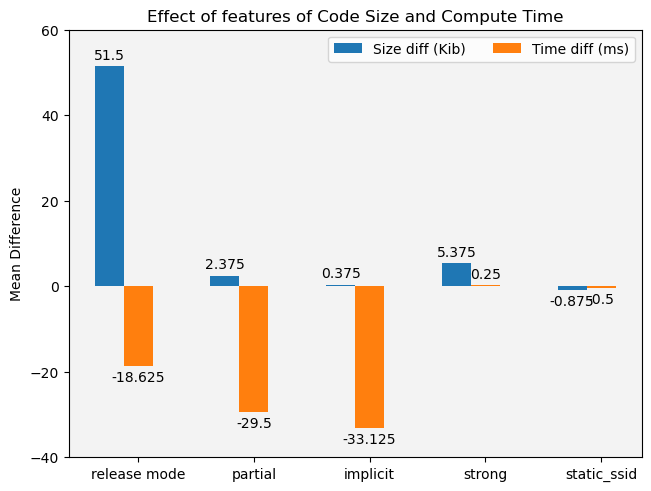

In [53]:
# graph the change in code size and compute time by feature flag
# adapted from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
# accessed 14/04/2023

# first setup the data
variables = ["profile", "partial", "implicit", "strong", "static_ssid"]
measurables = ["Size diff (Kib)", "Time diff (ms)"]
comp_values = {"profile": "release"}
diffs = {
    v: dict(zip(measurables, compute_size_and_time_diffs(df, v, comp_values.get(v, True))))
    for v in variables
}
data = {
    t: tuple(diffs[v][t] for v in variables)
    for t in measurables
}

# now setup the graph stuff
x = np.arange(len(variables))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout="constrained")

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('Mean Difference')
ax.set_title('Effect of features of Code Size and Compute Time')
ax.set_xticks(x + width, ["release mode"] + variables[1:])
ax.legend(loc='upper right', ncols=3)
ax.set_facecolor("#f3f3f3")
ax.set_ylim(-40, 60)

# plt.savefig("/home/tritoke/feature_effects.eps")
plt.show()